In [1]:
import shapefile
import geopandas as gpd
import fiona
import shapely
import pyproj
from shapely.geometry import *
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# from mpl_toolkits.basemap import Basemap
# import matplotlib.pyplot as plt

In [3]:
# sf = shapefile.Reader("/home/marcio/MEGA/Datathon/Cobertura_Vegetal_e_Uso_da_Terra_2014/Cobertura_Vegetal_e_Uso_da_Terra_2014.shp")

In [157]:
uso_da_terra = gpd.read_file("/home/marcio/MEGA/Datathon/Cobertura_Vegetal_e_Uso_da_Terra_2014/Cobertura_Vegetal_e_Uso_da_Terra_2014.shp")
uso_da_terra["CLASSE_ig"].unique()

16

In [162]:
uso_da_terra["CLASSE_ig"].unique()

array(['Corpos d’água continentais', 'Vegetação gramíneo-lenhosa',
       'Formação Pioneira com influência marinha',
       'Vegetação arbórea não florestal', 'Áreas Urbanas', 'Praia',
       'Formação Pioneira com influência flúvio-marinh',
       'Formação Pioneira com influência flúvio-lacust', 'Uso agrícola',
       'Floresta Ombrófila Densa', 'Afloramento Rochoso', 'Solo exposto',
       'Reflorestamento', 'Atividades de Extração Mineral', 'Uso Agrícola',
       'Corpos d’água costeiros'], dtype=object)

In [163]:
uso_da_terra["Sigla"].unique()

array(['Con', 'Vg', 'Rd', 'Vab', 'Au', 'P', 'Ma', 'Mh', 'Rh', 'Ra', 'Rb',
       'Bh', 'Agp', 'Vao', 'V1b', 'V1s', 'V2s', 'Afs', 'V2b', 'Agt', 'Afc',
       'V2m', 'Se', 'Vap', 'Rf', 'V3m', 'V1m', 'V3s', 'Vaf', 'Em', 'Bm',
       'Cos', 'Ap'], dtype=object)

In [14]:
uso_da_terra.head(2)

,ANO,AREA_ha,AREA_m2,CLASSE_ig,ESTAGIO_SU,FORMACOES_,GRUPO_ig,Legenda,OBJECTID,OBJECTID_1,PERIMETRO,ShapeSTAre,ShapeSTLen,Shape_Leng,Sigla,geometry
0,2014-01-01T00:00:00.000Z,0.868489,8684.889153,Corpos d’água continentais,None,None,Outros,Corpos d’água continentais,1,1,441.128326,8684.890137,441.128326,441.128326,Con,"POLYGON ((646939.5791020403 7448855.807802822,..."
1,2014-01-01T00:00:00.000Z,0.220934,2209.343321,Corpos d’água continentais,None,None,Outros,Corpos d’água continentais,2,2,241.436403,2209.344238,241.436403,241.436403,Con,"POLYGON ((643857.576302072 7450526.225802864, ..."


In [8]:
bairros = gpd.read_file("/home/marcio/MEGA/Datathon/Bairros/Limite_de_Bairros.shp")
bairros.head(2)

,AREA_PLANE,CODBAIRRO,CODRA,LINK,NOME,REGIAO_ADM,SHAPE_STAr,SHAPE_STLe,geometry
0,1,13,21,Paqueta&area=013,Paquetá,PAQUETA,1.705685e+06,24841.426669,(POLYGON ((692697.5299891517 7476634.890106629...
1,3,98,20,Freguesia (Ilha) &area=98,Freguesia (Ilha),ILHA DO GOVERNADOR,4.056403e+06,18303.595718,(POLYGON ((689143.1898898408 7477498.200091433...


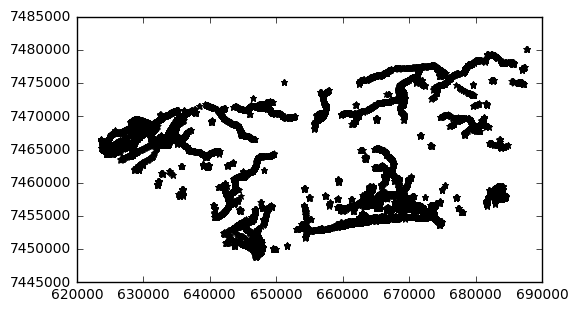

In [7]:
corpos_dagua_cont = uso_da_terra[uso_da_terra["CLASSE_ig"] == 'Corpos d’água continentais']
corpos_dagua_cont.plot(marker='*', color='blue', markersize=5);
corpos_dagua_cont = corpos_dagua_cont.to_crs(bairros.crs)
plt.show()

In [8]:
bairro_poly = bairros['geometry']
corpos_dagua_continental_poly = uso_da_terra[uso_da_terra["CLASSE_ig"] == 'Corpos d’água continentais']['geometry']

In [165]:
i = 2
print("{")
for sigla in uso_da_terra["CLASSE_ig"].unique():
    print('"'+sigla+'"', ":", i, ",")
    i += 1
print("}")

{
"Corpos d’água continentais" : 2 ,
"Vegetação gramíneo-lenhosa" : 3 ,
"Formação Pioneira com influência marinha" : 4 ,
"Vegetação arbórea não florestal" : 5 ,
"Áreas Urbanas" : 6 ,
"Praia" : 7 ,
"Formação Pioneira com influência flúvio-marinh" : 8 ,
"Formação Pioneira com influência flúvio-lacust" : 9 ,
"Uso agrícola" : 10 ,
"Floresta Ombrófila Densa" : 11 ,
"Afloramento Rochoso" : 12 ,
"Solo exposto" : 13 ,
"Reflorestamento" : 14 ,
"Atividades de Extração Mineral" : 15 ,
"Uso Agrícola" : 16 ,
"Corpos d’água costeiros" : 17 ,
}


In [166]:
dictionary = {
"Corpos d’água continentais" : 2 ,
"Vegetação gramíneo-lenhosa" : 3 ,
"Formação Pioneira com influência marinha" : 4 ,
"Vegetação arbórea não florestal" : 5 ,
"Áreas Urbanas" : 6 ,
"Praia" : 7 ,
"Formação Pioneira com influência flúvio-marinh" : 8 ,
"Formação Pioneira com influência flúvio-lacust" : 9 ,
"Uso agrícola" : 10 ,
"Floresta Ombrófila Densa" : 11 ,
"Afloramento Rochoso" : 12 ,
"Solo exposto" : 13 ,
"Reflorestamento" : 14 ,
"Atividades de Extração Mineral" : 15 ,
"Uso Agrícola" : 16 ,
"Corpos d’água costeiros" : 17
}

In [167]:
def init_borough():
    borough = []
    borough.append("Nome")
    borough.append("Cod")
    for sig in dictionary.keys():
        borough.append(0)
    borough.append(0)
    borough.append(0)
    return borough

In [172]:
table = []
for bairro in bairros[['NOME', 'CODBAIRRO', 'geometry']].iterrows():
    b = init_borough()
    b[0] = bairro[1]['NOME']
    b[1] = bairro[1]['CODBAIRRO']
    for udt in uso_da_terra[["CLASSE_ig", 'geometry']].iterrows():
        if(bairro[1]['geometry'].intersects(udt[1]['geometry'])):
            b[dictionary[udt[1]["CLASSE_ig"]]] += bairro[1]['geometry'].intersection(udt[1]['geometry']).area
    b[18] = bairro[1]['geometry'].area
    table.append(b)

In [173]:
population =  pd.read_csv("/home/marcio/MEGA/Datathon/populacao.csv", encoding="ISO8859-14", sep=";")
population.head(2)

,Código do Item Geográfico,Nível Geográfico,Item Geográfico,Ordem Geográfica,Código do Item Temporal,Nível Temporal,Item Temporal,Sexo,Sexo (código),Sexo (ordem),Freqüência,Observações
0,3304557,9235,RIO DE JANEIRO,1,2010,8030,31/07/2010,Masculino,"1,00","1,00",2959817,2959817
1,3304557,9235,RIO DE JANEIRO,1,2010,8030,31/07/2010,Feminino,"2,00","2,00",3360629,3360629


In [174]:
population = population.drop([0,1])
population['Código do Item Geográfico'] = population['Código do Item Geográfico'].astype(int).subtract(3304557000)

In [175]:
pop = population["Código do Item Geográfico"].unique()
pop

array([ 60, 138,  57,  31, 125,  34,  82, 115,  99, 131, 143, 139,  28,
        79,  37,  14,  42,  55, 111,   4, 132,  68,  94, 102,  72,  12,
         5,  70,   1,  84,   7, 123, 114, 137,  67, 157,  18,  43,  13,
       105, 140,  85, 148,  92,  58,  71, 150,  56,  51,   8,   9, 116,
        86, 122,   2,  83,  23, 160,  10,  35, 124, 142, 145,  77,  16,
       149, 104,  19,  66, 130, 146,  81, 155,  46,  22, 118, 117,  95,
        21,  11,  20,  17,  52,  73,  96,  27,  36,  32, 158,  80, 147,
        53, 120,  39,  78, 106,  98, 153,  44, 126, 154, 141,  87, 144,
        40,  41,  59,  61, 112, 121,  29,  90, 113,  69,  38,  97, 135,
        49, 109, 127,   6,  48,  76, 156,  50, 107, 128, 101,   3,  25,
        26,  47, 152, 100, 103, 108,  89,  88, 119,  30,  54, 151,  75,
        15, 134, 133, 159,  74,  63,  24,  45,  64,  33,  62,  93,  91,
        65, 110])

In [178]:
table_copy = list(table)

In [179]:
for i in range(len(table_copy)):
    for pop in population.iterrows():
        if int(table_copy[i][1]) ==  pop[1]["Código do Item Geográfico"]:
            table_copy[i][19] += pop[1]["Observações"]/table_copy[i][18]

In [181]:
tabela_bairros = pd.DataFrame(table_copy, columns=['Nome_do_bairro', 'Cod_do_bairro', 'Corpos d’água continentais', 'Vegetação gramíneo-lenhosa',
       'Formação Pioneira com influência marinha',
       'Vegetação arbórea não florestal', 'Áreas Urbanas', 'Praia',
       'Formação Pioneira com influência flúvio-marinh',
       'Formação Pioneira com influência flúvio-lacust', 'Uso agrícola',
       'Floresta Ombrófila Densa', 'Afloramento Rochoso', 'Solo exposto',
       'Reflorestamento', 'Atividades de Extração Mineral', 'Uso Agrícola',
       'Corpos d’água costeiros', 'Área_do_bairro', 'Dens_pop'])

In [207]:
tabela_bairros['Cod_do_bairro'] = tabela_bairros['Cod_do_bairro'].astype(int)
tabela_bairros = tabela_bairros.sort_values("Cod_do_bairro")
tabela_bairros.head(5)

,Nome_do_bairro,Cod_do_bairro,Corpos d’água continentais,Vegetação gramíneo-lenhosa,Formação Pioneira com influência marinha,Vegetação arbórea não florestal,Áreas Urbanas,Praia,Formação Pioneira com influência flúvio-marinh,Formação Pioneira com influência flúvio-lacust,Uso agrícola,Floresta Ombrófila Densa,Afloramento Rochoso,Solo exposto,Reflorestamento,Atividades de Extração Mineral,Uso Agrícola,Corpos d’água costeiros,Área_do_bairro,Dens_pop
100,Saúde,1,0.000000,0.000000,0.0,4519.678973,3.585646e+05,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.0,0.0,0.0,3.638176e+05,0.113084
95,Gamboa,2,0.000000,22973.255094,0.0,25068.565923,1.064491e+06,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.0,0.0,0.0,1.112903e+06,0.011778
96,Santo Cristo,3,11328.130861,0.000000,0.0,34472.372319,1.627065e+06,0.0,0.000000,0.0,0.0,0.0,2735.145889,0.000000,9001.28729,0.0,0.0,0.0,1.684721e+06,0.007319
157,Caju,4,65101.284417,82750.046254,0.0,357923.214032,4.746115e+06,0.0,63213.513426,0.0,0.0,0.0,0.000000,11887.198484,0.00000,0.0,0.0,0.0,5.347481e+06,0.003829
97,Centro,5,0.000000,0.000000,0.0,149648.884849,5.246767e+06,0.0,0.000000,0.0,0.0,0.0,0.000000,13657.030310,0.00000,0.0,0.0,0.0,5.424739e+06,0.002315


In [204]:
tabela_bairros.to_csv("tabela_bairros.csv")

In [218]:
lat_long = pyproj.Proj("+init=EPSG:4326")
ibge = pyproj.Proj("+init=EPSG:29183")
def coord_convert(x, y):
    return pyproj.transform(lat_long, ibge, x, y )

In [4]:
infectados = pd.read_csv("/home/marcio/MEGA/Datathon/zikario.csv")
infectados['DT_NOTIFIC'] = pd.to_datetime(infectados['DT_NOTIFIC'])
infectados['DT_NASC'] = pd.to_datetime(infectados['DT_NASC'])
infectados['ID_BAIRRO'] = infectados['ID_BAIRRO'].astype(int)
infectados = infectados.sort_values('ID_BAIRRO')
infectados.head(2)

,Unnamed: 0,ID_AGRAVO,DT_NOTIFIC,SEM_NOT,ID_MUNICIP,DT_SIN_PRI,DT_NASC,CS_SEXO,ID_DISTRIT,ID_BAIRRO,NM_BAIRRO,DT_OBITO,latitude,longitude
7629,7741,A90,2015-12-18,50,330455,2015-12-17,1928-10-11,M,130,0,TIJUCA,NaN,-22.93249,-43.2383
5207,5288,A90,2015-12-10,49,330455,2015-12-05,1991-07-23,F,130,0,TIJUCA,NaN,-22.92616,-43.2370


In [217]:
len(infectados)

109333

In [ ]:
for i in range(len(infectados)):
    infectados['latitude'][i], infectados['longitude'][i] = coord_convert(infectados['latitude'][i], infectados['longitude'][i])

/home/marcio/.local/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [ ]:
for i in range(len(infectados)):
    point = Point(infectados['latitude'][i],infectados['longitude'][i])
        for bairro in bairros[['NOME', 'CODBAIRRO', 'geometry']].iterrows():
            if(bairro[1]['geometry'].intersects(point):
                infectados['ID_BAIRRO'][i] = bairro[1]['CODBAIRRO']
                infectados['NM_BAIRRO'][i] = bairro[1]['NOME']

In [3]:
def levenshtein_distance(string_1, string_2):
    try:
        m = len(string_1)+1
        n = len(string_2)+1
        ld = np.zeros((n, m))
        for i in range(n):
            ld[i][0] = i
        for j in range(m):
            ld[0][j] = j
        for j in range(1, m):
            for i in range(1, n):
                if string_1[j-1] is string_2[i-1]:
                    ld[i][j] = ld[i-1][j-1]
                else:
                    ld[i, j] = np.min([ld[i-1][j] + 1, ld[i][j-1] + 1, ld[i-1][j-1] + 1])
        return ld[n-1][m-1]/float(len(string_2))
    except ZeroDivisionError as e:
        print(e.args)

In [6]:
infectados['NM_BAIRRO'] = infectados['NM_BAIRRO'].str.lower()

In [11]:
infectados['NM_BAIRRO'] = infectados['NM_BAIRRO'].astype(str)

In [ ]:
for i in range(len(infectados)):
    d1 = 100
    for bairro in bairros[['NOME', 'CODBAIRRO', 'geometry']].iterrows():
        d = levenshtein_distance(infectados['NM_BAIRRO'][i], bairro[1]['NOME'])
        if d < d1:
            infectados['ID_BAIRRO'][i] = bairro[1]['CODBAIRRO']
            d1 = d

/home/marcio/.local/lib/python3.5/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
